<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> # BERTELLI FLORIAN  
<b> Student 2:</b> # REBOULLET PAUL
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [2]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4


o1_1 = sigmoid(w1_11*x1 + w1_21*x2 + w1_01*1)
o1_2 = sigmoid(w1_12*x1 + w1_22*x2 + w1_02*1)
o2_1 = sigmoid(w2_11*o1_1 + w2_21*o1_2 + w2_01*1)

print("=== FORWARD PASS 1 ===")
print("o =", o2_1)

            
# Partial derivatives of the loss wrt weights of the second layer
dL_w2_01 = 2*(o2_1 - y)*o2_1*(1-o2_1)*1
dL_w2_11 = 2*(o2_1 - y)*o2_1*(1-o2_1)*o1_1
dL_w2_21 = 2*(o2_1 - y)*o2_1*(1-o2_1)*o1_2

# Partial derivatives of the loss wrt weights of the first layer
du = 2*(o2_1 - y)*o2_1*(1-o2_1)
dL_w1_01 = du*w2_11*o1_1*(1-o1_1)*1
dL_w1_11 = du*w2_11*o1_1*(1-o1_1)*x1
dL_w1_21 = du*w2_11*o1_1*(1-o1_1)*x2
dL_w1_02 = du*w2_21*o1_2*(1-o1_2)*1
dL_w1_12 = du*w2_21*o1_2*(1-o1_2)*x1
dL_w1_22 = du*w2_21*o1_2*(1-o1_2)*x2

print( dL_w2_01)
# Weights updates
w1_01 -= lr*dL_w1_01
w1_11 -= lr*dL_w1_11
w1_21 -= lr*dL_w1_21
w1_02 -= lr*dL_w1_02
w1_12 -= lr*dL_w1_12
w1_22 -= lr*dL_w1_22
w2_01 -= lr*dL_w2_01
w2_11 -= lr*dL_w2_11
w2_21 -= lr*dL_w2_21

print("=== BACKWARD PASS ===")
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)

o1_1 = sigmoid(w1_11*x1 + w1_21*x2 + w1_01*1)
o1_2 = sigmoid(w1_12*x1 + w1_22*x2 + w1_02*1)
o2_1 = sigmoid(w2_11*o1_1 + w2_21*o1_2 + w2_01*1)

print("=== FORWARD PASS 2 ===")
print("o =", o2_1)


=== FORWARD PASS 1 ===
o = 0.5597295991095776
0.07872508892961441
=== BACKWARD PASS ===
w1_01 = 0.2540331790269339
w1_11 = 0.3432265432215471
w1_21 = 0.8108066358053868
w1_02 = -0.4341841377344243
w1_12 = -0.5273473101875394
w1_22 = 0.19316317245311515
w2_01 = 0.10637455535192797
w2_11 = -0.8541467506279605
w2_21 = 0.2745727217772572
=== FORWARD PASS 2 ===
o = 0.40648823589210115


<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        u_1 = self.input.dot(self.W_input_to_hidden) # Compute activations for the hidden layer
              # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        self.o_hidden[:, :-1] = self.transfer_f(self.u_hidden) # Compute output of hidden layer
        u_2 = self.o_hidden.dot(self.W_hidden_to_output) # Compute activations for the output layer
        self.u_output = u_2
        self.o_output = self.transfer_f(self.u_output) # Compute output of output layer

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [4]:
# First define your neural network
model = NeuralNetwork(2, 2, 1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [5]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        
        # Compute partial derivative of loss with respect to activations of output layer
        self.dL_du_output = 2*(self.o_output-targets)*transfer_df(self.u_output)

        
        # Compute partial derivative of loss with respect to activations of hidden layer
        self.dL_du_hidden = self.W_hidden_to_output[:-1].dot(np.transpose(self.dL_du_output)).T * transfer_df(self.u_hidden)

        
        # Compute partial derivative of loss with respect to weights
        dW_input_to_hidden =(np.transpose(self.input)).dot(self.dL_du_hidden)
        dW_hidden_to_output = (np.transpose(self.o_hidden)).dot(self.dL_du_output)
        
        # Make updates
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [6]:
# First define your neural network
model = NeuralNetwork(2, 2, 1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)



# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

Output = [[0.40648824]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [7]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


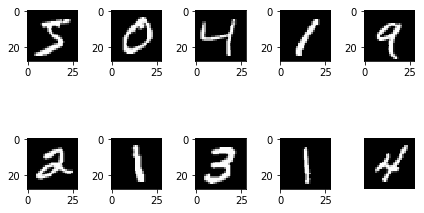

In [8]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [9]:
# Define your neural network
mnist_model = NeuralNetwork(784, 30, 10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Training time: 34.50637221336365


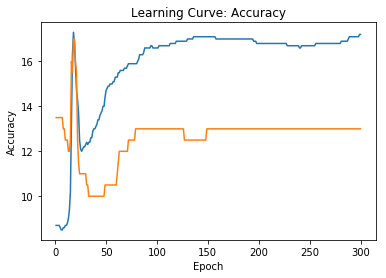

The accuracy on our model is 15.7 % with a learning rate equals to 0.1
Training time: 34.378376722335815


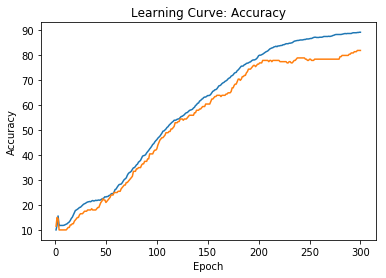

The accuracy on our model is 83.78 % with a learning rate equals to 1.0
Training time: 34.34180569648743


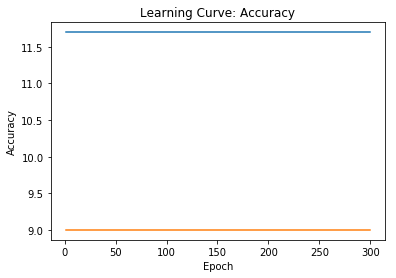

The accuracy on our model is 10.280000000000001 % with a learning rate equals to 10


In [10]:
# Train NN and print accuracy on test data
learning_rate_list= [0.1 , 1.0 ,10] 
for x in learning_rate_list:
    mnist_model.weights_init()
    mnist_model.train( small_training_data, small_validation_data, 300 , x )
    print('The accuracy on our model is' , mnist_model.predict(test_data)/len(test_data[0])*100 , '% with a learning rate equals to' , x)
    


<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training time: 32.07995629310608


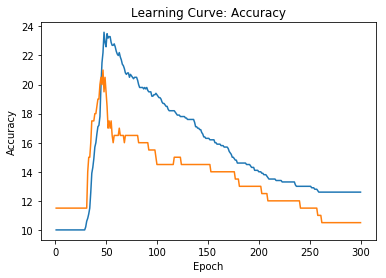

The accuracy on our model is 12.540000000000001 % with a learning rate equals to 0.1
Training time: 31.948179721832275


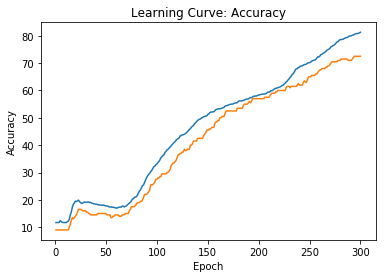

The accuracy on our model is 75.82 % with a learning rate equals to 1.0
Training time: 31.88063335418701


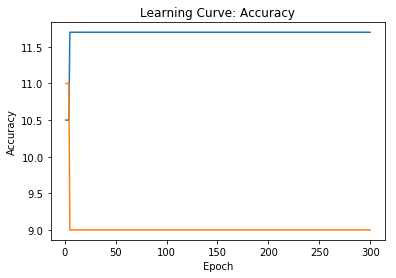

The accuracy on our model is 10.280000000000001 % with a learning rate equals to 10
Training time: 40.32527828216553


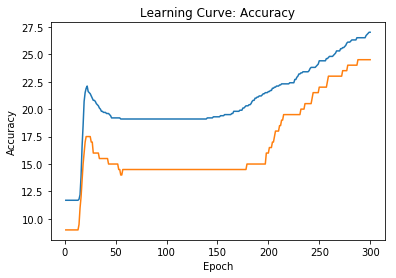

The accuracy on our model is 25.56 % with a learning rate equals to 0.1
Training time: 40.27791166305542


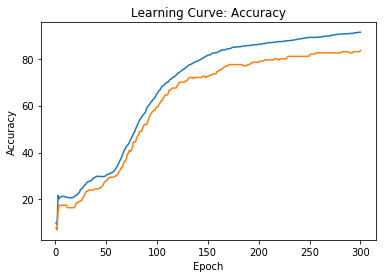

The accuracy on our model is 84.8 % with a learning rate equals to 1.0
Training time: 40.366005182266235


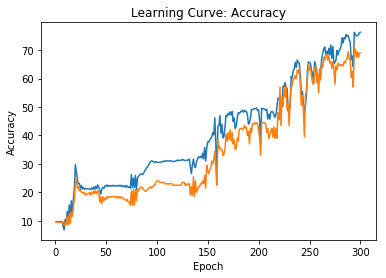

The accuracy on our model is 67.73 % with a learning rate equals to 10


In [11]:
# Define your neural network
# 15 hidden neurons 
mnist_model = NeuralNetwork(784, 15, 10)
learning_rate_list= [0.1 , 1.0 ,10] 
for x in learning_rate_list:
    mnist_model.weights_init()
    mnist_model.train( small_training_data, small_validation_data, 300 , x )
    print('The accuracy on our model is' , mnist_model.predict(test_data)/len(test_data[0])*100 , '% with a learning rate equals to' , x)

    
    
# 75 hidden neurons
mnist_model = NeuralNetwork(784, 75, 10)
learning_rate_list= [0.1 , 1.0 ,10] 
for x in learning_rate_list:
    mnist_model.weights_init()
    mnist_model.train( small_training_data, small_validation_data, 300 , x )
    print('The accuracy on our model is' , mnist_model.predict(test_data)/len(test_data[0])*100 , '% with a learning rate equals to' , x)




<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Training time: 2.813772678375244


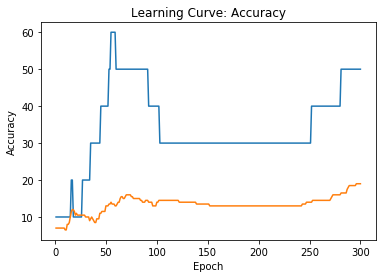

The accuracy on our model is 16.619999999999997 % with a learning rate equals to 0.1
Training time: 2.787510871887207


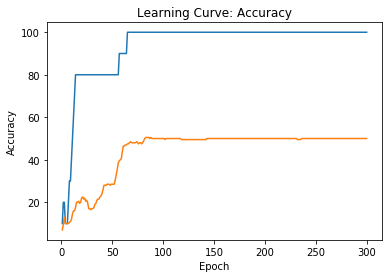

The accuracy on our model is 49.19 % with a learning rate equals to 1.0
Training time: 2.8150241374969482


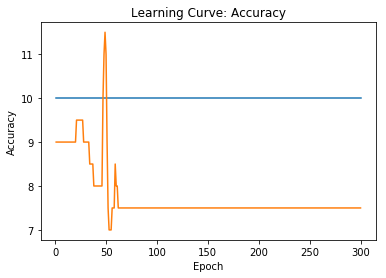

The accuracy on our model is 8.61 % with a learning rate equals to 10
Training time: 2.6358180046081543


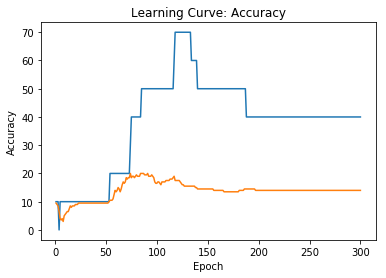

The accuracy on our model is 12.540000000000001 % with a learning rate equals to 0.1
Training time: 2.62969708442688


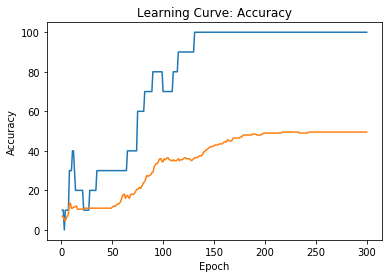

The accuracy on our model is 46.9 % with a learning rate equals to 1.0
Training time: 2.6329662799835205


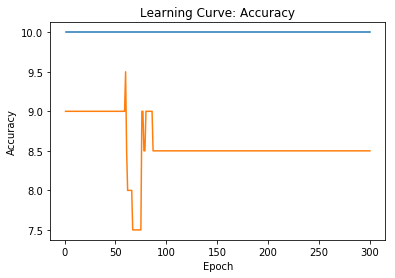

The accuracy on our model is 10.209999999999999 % with a learning rate equals to 10
Training time: 3.3958022594451904


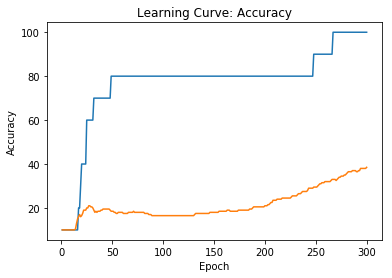

The accuracy on our model is 37.169999999999995 % with a learning rate equals to 0.1
Training time: 3.4142985343933105


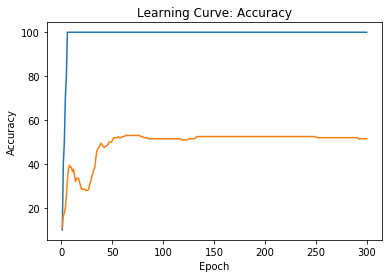

The accuracy on our model is 50.739999999999995 % with a learning rate equals to 1.0
Training time: 3.3969614505767822


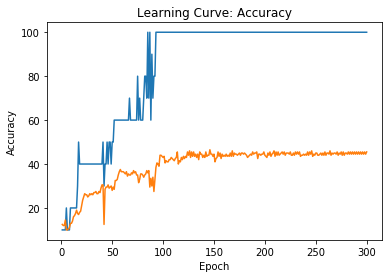

The accuracy on our model is 40.8 % with a learning rate equals to 10


In [12]:
# Train NN and print accuracy on test data
# 30 hidden neurons
mnist_model = NeuralNetwork(784, 30, 10)
learning_rate_list= [0.1 , 1.0 ,10] 
for x in learning_rate_list:
    mnist_model.weights_init()
    mnist_model.train( vsmall_training_data, small_validation_data, 300 , x )
    print('The accuracy on our model is' , mnist_model.predict(test_data)/len(test_data[0])*100 , '% with a learning rate equals to' , x)



# 15 hidden neurons
mnist_model = NeuralNetwork(784, 15, 10)
learning_rate_list= [0.1 , 1.0 ,10] 
for x in learning_rate_list:
    mnist_model.weights_init()
    mnist_model.train( vsmall_training_data, small_validation_data, 300 , x )
    print('The accuracy on our model is' , mnist_model.predict(test_data)/len(test_data[0])*100 , '% with a learning rate equals to' , x)


# 75 hidden neurons
mnist_model = NeuralNetwork(784, 75, 10)
learning_rate_list= [0.1 , 1.0 ,10] 
for x in learning_rate_list:
    mnist_model.weights_init()
    mnist_model.train( vsmall_training_data, small_validation_data, 300 , x )
    print('The accuracy on our model is' , mnist_model.predict(test_data)/len(test_data[0])*100 , '% with a learning rate equals to' , x)


<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

_Answer_: 

So we can observe in Question 2.1.2 and 2.13, different neural networks model but most importantly different learning rate for each of these neural networks. Indeed, for each of us, if the learning rate is equals to 0.1, we have bad accuracy. This is because with a to little learning rate, we can not flew a local minimum, or we need more than 300 iterations to reach the global minimun. In a second time, we observe that if our learning rate is to high (e.g 10 here) our results are bad to because we can't reach the global minimun because it is to high, not enough precise. Indeed, a good learning rate is not to high or low (e.g 1 here). It permits us to have good results because with a quite little number of iterations we can reach the global optimum and we won't miss it because we are enough precise. A good way to do, that we don't do here can be to have a learning rate which is evolving during our training, from high value to low value, in order to be able to flee local minimun at the beginning and then be able to be enough precise to reach the global minimun perfectly.

Furthermore, we see in these questions that for a learning rate equals to 1, we have different efficiencies according to the architecture of our neural network. Indeed some architectures work better than others, but this is difficult to analyse. Indeed, a good way is to try as we do before several ones and keep the best one, in an empirical way


Lastly, with Question  2.1.4, when we use only a small dataset for the training we obtain a gain in speed (from 30 sec to 2 sec) but we are not as efficient as before. Indeed, because our dataset is to small, we obtain a model after the training that is really efficient for the training data but not at all for validation data for instance and for test data either. We have an important Overfit because our training data set is too small at the beginning. This reminds us the importance to have a large dataset when training to obtain a model efficient on a large test dataset

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

Answer: The one which gives us the best accuracy on our tests is the one with 75 hidden neurons and a learning rate equals to one. Indeed, the learning rate equals to one is a good alternative to flee local minimun, and manage to have enough precision to reach the global minimun or to be really near it within a few iterations.

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 2680.7256412506104


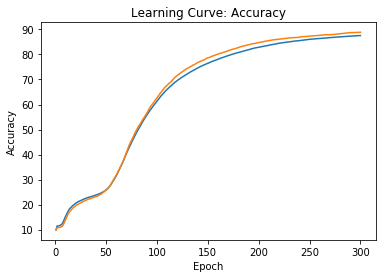

The accuracy on our model is 88.4 % with a learning rate equals to 10


In [13]:
mnist_model = NeuralNetwork(784, 75, 10)
mnist_model.weights_init()
mnist_model.train( training_data, validation_data, 300 , 1 )
print('The accuracy on our model is' , mnist_model.predict(test_data)/len(test_data[0])*100 , '% with a learning rate equals to' , x)



Answer: $\frac{\partial L_{xe}}{\partial u_i} = \frac{e^{u_i}}{\sum_{k=1}^n e^{u_k}}- t_i $</div> 

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [13]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        u_1 = self.input.dot(self.W_input_to_hidden) # Compute activations for the hidden layer
              # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        self.o_hidden[:, :-1] = self.transfer_f(self.u_hidden) # Compute output of hidden layer
        u_2 = self.o_hidden.dot(self.W_hidden_to_output) # Compute activations for the output layer
        self.u_output = u_2
        self.o_output = softmax(self.u_output) # Compute output of output layer

        


In [19]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate_xe(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        
        # Compute partial derivative of loss with respect to activations of output layer
        self.dL_du_output = (softmax(self.u_output)-targets)

      
        # Compute partial derivative of loss with respect to activations of hidden layer
        self.dL_du_hidden = np.dot(self.W_hidden_to_output[:-1],self.dL_du_output.T).T * transfer_df(self.u_hidden)

        # Compute partial derivative of loss with respect to weights
        dW_input_to_hidden =(np.transpose(self.input)).dot(self.dL_du_hidden)
        dW_hidden_to_output = (np.transpose(self.o_hidden)).dot(self.dL_du_output)
        # Make updates
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

Training time: 21.42156481742859


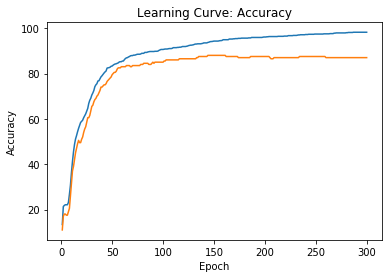

In [20]:
# Define your neural network
mnist_model_xe= NeuralNetwork(784, 30, 10)
    


# Train NN and print accuracy on validation data
mnist_model_xe.weights_init()
mnist_model_xe.train_xe( small_training_data, small_validation_data, 300 , 1 )


In [ ]:
print('The accuracy on our model is' , mnist_model.predict(test_data)/len(test_data[0])*100 , '% with a learning rate equals to' , 1)


<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

_Answer: 

We observe that for the same learning and the same architecture we obtain the same results but within less time (10 sec less which represents 30%, this is a huge gain). So this new loss function is really interesting as it permits to reduce heavily our computation time.
However this model is more likely to overfit so we must be careful.


<div align="center"><b>THE END!</b>